In [0]:
# Description: This program classifies images

In [2]:
#Load the data
from keras.datasets import cifar10
(x_train, y_train), (x_test,y_test) = cifar10.load_data()

Using TensorFlow backend.


In [3]:
#Get the data types
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
#Get the shape of the data
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [5]:
#Take a look at the first image in the training data set
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

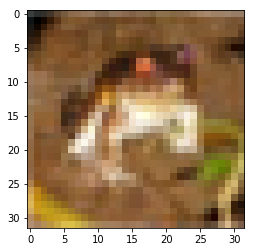

In [6]:
#Show the image as a picture
import matplotlib.pyplot as plt
img = plt.imshow(x_train[0])

In [7]:
#Print the label of the first image of the training data set
print('The label is:', y_train[0])

The label is: [6]


In [8]:
#One Hot Encoding: Convert the labels into a set of 10 numbers to input into the neural network
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# print the new labels in the training data set
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [0]:
#Normalize the pixels in the images  to be values between 0 and 1
x_train = x_train / 255
x_test = x_test /255

In [11]:
#Build the CNN
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#Create the architecture
model = Sequential()

#Convolution layer to extract features from input image
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)))

#Pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Convolution layer to extract features from input image
model.add(Conv2D(32, (5,5), activation='relu'))

#Pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten the image layer
model.add(Flatten())

model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='softmax'))



W0711 20:13:27.358891 140453025163136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0711 20:13:27.377387 140453025163136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0711 20:13:27.381951 140453025163136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0711 20:13:27.401737 140453025163136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [12]:
#Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer = 'adam',
    metrics =['accuracy']
)

W0711 20:14:45.216073 140453025163136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0711 20:14:45.247650 140453025163136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [13]:
#Train the model
hist = model.fit(x_train, y_train_one_hot, batch_size=256, epochs=10, validation_split=0.3)

W0711 20:16:39.325152 140453025163136 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0711 20:16:39.514693 140453025163136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 52s 1ms/step - loss: 1.7251 - acc: 0.3731 - val_loss: 1.4676 - val_acc: 0.4721
Epoch 2/10
35000/35000 [==============================] - 52s 1ms/step - loss: 1.3876 - acc: 0.5040 - val_loss: 1.3376 - val_acc: 0.5200
Epoch 3/10
35000/35000 [==============================] - 52s 1ms/step - loss: 1.2483 - acc: 0.5569 - val_loss: 1.2679 - val_acc: 0.5554
Epoch 4/10
35000/35000 [==============================] - 52s 1ms/step - loss: 1.1491 - acc: 0.5964 - val_loss: 1.1519 - val_acc: 0.5964
Epoch 5/10
35000/35000 [==============================] - 53s 2ms/step - loss: 1.0621 - acc: 0.6268 - val_loss: 1.1007 - val_acc: 0.6175
Epoch 6/10
35000/35000 [==============================] - 53s 2ms/step - loss: 0.9819 - acc: 0.6567 - val_loss: 1.0911 - val_acc: 0.6180
Epoch 7/10
35000/35000 [==============================] - 53s 2ms/step - loss: 0.9281 - acc: 0.6753 - val_loss: 1.0711 - val_acc

In [14]:
#Evaluate the model
model.evaluate(x_test, y_test_one_hot)[1]

10000/10000 [==============================] - 5s 486us/step


0.6656

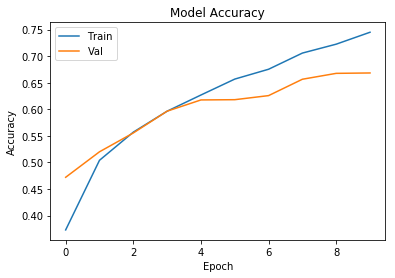

In [16]:
#Visualize the models accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

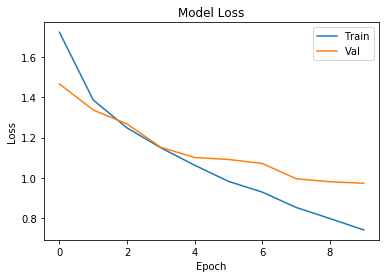

In [18]:
#Visualize the models accuracy
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [19]:
#Load data to make classifications
#from google.colab import files
#uploaded = files.upload()
my_image = plt.imread('cat.4014.jpg')

Saving cat.4014.jpg to cat.4014.jpg


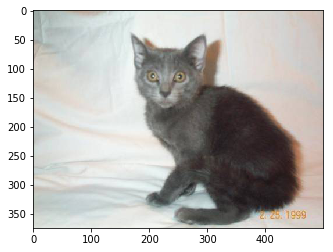

In [20]:
#Show the uploaded image
img = plt.imshow(my_image)

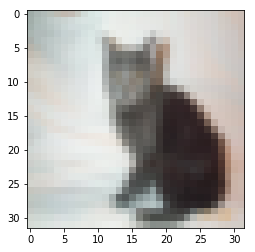

In [21]:
#Resize the image
from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3))
img = plt.imshow(my_image_resized)

In [24]:
#Get the probabilities for each class
import numpy as np
probabilities = model.predict( np.array([my_image_resized,]) )
#Show the probability for each class
probabilities

array([[2.0473169e-03, 5.8718451e-06, 9.6833229e-02, 8.5426587e-01,
        2.0653252e-02, 4.0493100e-03, 2.2059367e-03, 1.5260294e-02,
        5.5901473e-04, 4.1198554e-03]], dtype=float32)

In [29]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])

#Print the first 5 most likely classes / labels
print('Most likely class:', number_to_class[index[9]], "--Probability:", probabilities[0, index[9]])
print('Second most likely class:', number_to_class[index[8]], "--Probability:", probabilities[0, index[8]])
print('Third most likely class:', number_to_class[index[7]], "--Probability:", probabilities[0, index[7]])
print('Fourth most likely class:', number_to_class[index[6]], "--Probability:", probabilities[0, index[6]])
print('Fifth most likely class:', number_to_class[index[5]], "--Probability:", probabilities[0, index[5]])

Most likely class: cat --Probability: 0.85426587
Second most likely class: bird --Probability: 0.09683323
Third most likely class: deer --Probability: 0.020653252
Fourth most likely class: horse --Probability: 0.015260294
Fifth most likely class: truck --Probability: 0.0041198554


In [0]:
#Save the model
model.save('my_model.h5')

In [0]:
#To load the model
from keras.models import load_model
model = load_model('my_model.h5')